In [ ]:
# Importing modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
# Loading the data
# Load a sample of the data (10%)
data = pd.read_csv('/content/Dataset-SA.csv').sample(frac=0.1, random_state=42)
data.head()


,product_name,product_price,Rate,Review,Summary,Sentiment
193551,BAJAJ 17 L Solo Microwave Oven1701MT White,4498,1,worst experience ever!,not working properly,neutral
149083,ScotchBrite Sponge WipeLarge Pack of 3,189,5,just wow!,very good,positive
194975,limraz furniture Engineered Wood Computer Desk...,1298,5,classy product,it is perfect if you want to work on the compu...,positive
29981,Lakm?? Eyeconic Kajal Twin Pack??????(Deep Bla...,218,5,simply awesome,thanks flipkart,positive
137259,KENT Aura Portable Room Air PurifierPink,6999,5,simply awesome,thanks product looks good not sure if any inst...,positive


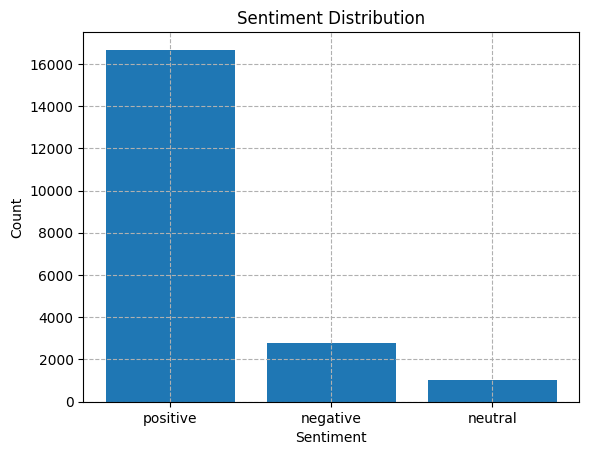

In [ ]:

# Visualize the sentiment distribution
#  The next step now is to count the frequency of each category of sentiments in the data.
#  this will return both the index of each category and the values
#  so we can use the two to make a bar plot
# Visualize the distribution of sentiments
sentiment_counts = data['Sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(linestyle='--')
plt.show()

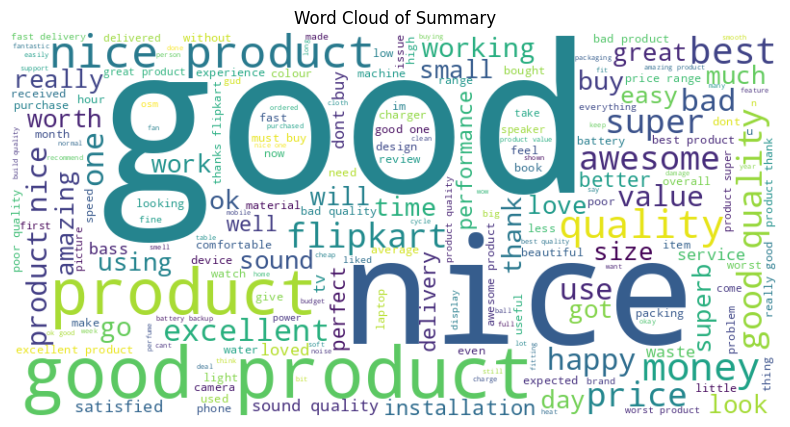

In [ ]:

# Visualize the customers review summary using WordCloud
# we have to create a text variable which is basically the text data to be visualized
#  then we have to set the parameters of the wordcloud
#  the matplotlib imshow function is then called to visualize the texts


# Generate a word cloud for the 'Summary' column
text = ' '.join(data['Summary'].dropna())
wordcloud = WordCloud (width=800, height=400, background_color='white').generate (text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud,
interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Summary')
plt.show()

In [ ]:

# Features extraction and split the data (train and test set)
# the next step is to select the features for our model such as the predictor(s) and target variable ⚫ in this case, "summary column is the predictor and "Sentiment" column is the target variable ⚫ then we proceed to split the data into both the training and testing sets (80:20)

# Extract features from the text data
data = data.dropna()
X = data['Summary']
y = data['Sentiment']

# Train a machine Learning model
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Vectorization of the text data
# we now have to convert the data into the format that the algorithms understand ⚫ this is called vectorization
# both the train and test sets have to be vectorized
# this is a crucial step in machine learning models that use text data

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [ ]:
# Training - Multinomial Naive Bayes classifier
# • after we get our data ready for training then we proceed to initiating the model ⚫ then supply the training data to the model for it to learn

# Train Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_counts, y_train)


MultinomialNB()

In [ ]:
# Make predictions and check the accuracy of the model
# Make predictions using Multinomial Naive Bayes
y_pred_nb = nb_classifier.predict(X_test_counts)
accuracy_nb = accuracy_score (y_test, y_pred_nb)

print("Multinomial Naive Bayes Accuracy: ", accuracy_nb)
print("Multinomial Naive Bayes Classification Report: ")

print(classification_report(y_test, y_pred_nb))

Multinomial Naive Bayes Accuracy:  0.896398891966759
Multinomial Naive Bayes Classification Report: 
              precision    recall  f1-score   support

    negative       0.82      0.63      0.71       464
     neutral       0.78      0.04      0.08       172
    positive       0.90      0.99      0.94      2974

    accuracy                           0.90      3610
   macro avg       0.84      0.55      0.58      3610
weighted avg       0.89      0.90      0.87      3610



In [ ]:
# Training - Random Forest
# Train Random Forest Classifier
rf_classifier = RandomForestClassifier (n_estimators=100, random_state=42)
rf_classifier.fit(X_train_counts, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions using Random Forest Classifier
y_pred_rf = rf_classifier.predict(X_test_counts)
accuracy_rf = accuracy_score (y_test, y_pred_rf)
print("\nRandom Forest Classifier Accuracy: ", accuracy_rf)
print("Random Forest Classifier Classification Report: ")
print(classification_report (y_test, y_pred_rf))


Random Forest Classifier Accuracy:  0.9274238227146815
Random Forest Classifier Classification Report: 
              precision    recall  f1-score   support

    negative       0.85      0.78      0.82       464
     neutral       0.67      0.34      0.45       172
    positive       0.95      0.98      0.96      2974

    accuracy                           0.93      3610
   macro avg       0.82      0.70      0.74      3610
weighted avg       0.92      0.93      0.92      3610



In [ ]:
# Prediction on New Data ¶
# to make prediction on new data, let's write short function for each model
# the functions take the customer reviews as text then
# vectorize the input
# then pass it to the already-trained model to return the class of the sentiment
# Make predictions on new data

# Naives Bayes
def predict_sentiment_mt (text):
  text_counts = vectorizer.transform( [text])
  prediction = nb_classifier.predict(text_counts)[0]
  return prediction

# RandomForest
def predict_sentiment_rf (text):
  text_counts = vectorizer.transform( [text])
  prediction = rf_classifier.predict(text_counts)[0]
  return prediction

In [ ]:
# Case study

input_text = input("Enter the text: ")

if len(input_text) <3:
  print("Please enter a valid text")
else:
  predicted_sentiment = predict_sentiment_rf(input_text)
  print("Predicted sentiment:", predicted_sentiment)


Enter the text: g
Please enter a valid text


                                           Summary
0  The product is excellent and works as expected.
1      I had a terrible experience with this item.
2         Decent quality, but not worth the price.
3            Absolutely amazing! Highly recommend.
4                    Not bad, but could be better.

Sentiment Counts:
Predicted_Sentiment
positive    7
negative    2
neutral     1
Name: count, dtype: int64
                                           Summary Predicted_Sentiment
0  The product is excellent and works as expected.            positive
1      I had a terrible experience with this item.            positive
2         Decent quality, but not worth the price.            positive
3            Absolutely amazing! Highly recommend.            positive
4                    Not bad, but could be better.            positive
5                  The worst purchase I ever made.            negative
6          It does the job, nothing extraordinary.            positive
7               Fan

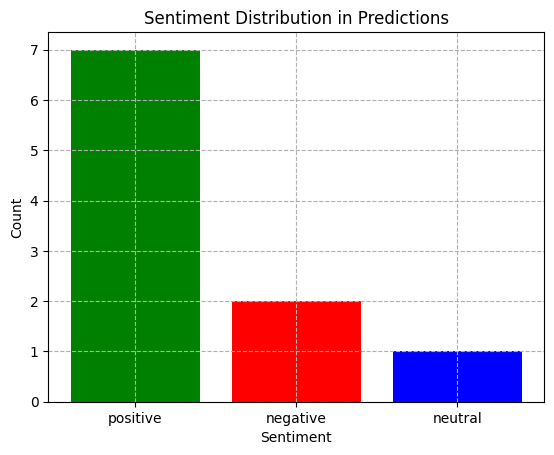

In [ ]:
# Load the new dataset (replace 'new_dataset.csv' with the actual file path)
new_data = pd.read_csv('/content/demo_dataset.csv')

# Check the first few rows
print(new_data.head())

# Ensure no missing values in the text column (assuming it's called 'Summary')
new_data = new_data.dropna(subset=['Summary'])

# Vectorize the new data
new_text_counts = vectorizer.transform(new_data['Summary'])

# Predict sentiments using the Random Forest Classifier
new_data['Predicted_Sentiment'] = rf_classifier.predict(new_text_counts)

# Count the total sentiments
sentiment_totals = new_data['Predicted_Sentiment'].value_counts()

# Display the sentiment counts
print("\nSentiment Counts:")
print(sentiment_totals)

# Save the predictions to a CSV file
new_data.to_csv('/content/predicted_sentiments.csv', index=False)

result=pd.read_csv('/content/predicted_sentiments.csv')
print(result.head(10))

# Plot the sentiment counts
plt.bar(sentiment_totals.index, sentiment_totals.values, color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution in Predictions')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(linestyle='--')
plt.show()


In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
import pandas as pd
nltk.download('averaged_perceptron_tagger_eng')

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Define function to preprocess text
def preprocess_text(text):
    # Remove non-alphabetical characters and convert to lowercase
    clean_text = re.sub("[^a-zA-Z]", " ", text).lower().strip()
    return clean_text

# Function to extract keywords (nouns and adjectives) from a sentence
def extract_keywords(sentence):
    words = word_tokenize(sentence)
    pos_tags = pos_tag(words)
    keywords = [word for word, tag in pos_tags if tag in ('JJ', 'NN')]  # Adjectives and Nouns
    return ' '.join(keywords)

# Define function to split text into sentences and analyze each sentence
def analyze_sentiment_per_sentence(text):
    # Split the text into individual sentences
    sentences = nltk.sent_tokenize(text)

    # Dictionary to store sentiment results for each sentence
    sentence_sentiments = []

    # To track contributing sentences and keywords
    positive_sentences = []
    negative_sentences = []
    contributing_keywords = {'positive': [], 'negative': []}

    for sentence in sentences:
        # Preprocess sentence
        clean_sentence = preprocess_text(sentence)

        # Get sentiment scores
        score = analyzer.polarity_scores(clean_sentence)

        # Classify sentiment based on score
        sentiment = "Neutral"
        if score['neg'] > 0.4:
            sentiment = "Negative"
            negative_sentences.append(sentence)
            contributing_keywords['negative'].extend(extract_keywords(sentence).split())
        elif score['pos'] > 0.4:
            sentiment = "Positive"
            positive_sentences.append(sentence)
            contributing_keywords['positive'].extend(extract_keywords(sentence).split())

        # Store sentence and its sentiment
        sentence_sentiments.append((sentence, sentiment, score))

    return {
        'sentence_sentiments': sentence_sentiments,
        'positive_sentences': positive_sentences,
        'negative_sentences': negative_sentences,
        'contributing_keywords': contributing_keywords
    }

# Sample review data
sample_data = [
    "This product is amazing. I love the quality and how it performs. The delivery was fast too.",
    "The phone stopped working after two days. The customer service was unhelpful and rude.",
    "It's an okay product, not too great, but not bad either. I expected more for the price.",
    "Worst purchase ever! It broke after a week. Terrible quality and terrible service.",
    "I highly recommend this! The performance is top-notch and it's really user-friendly.",
    "Not impressed. It does the job but feels cheap. I won't buy it again."
]

# Function to analyze the sample reviews and user input
def analyze_reviews():
    # Analyze sample reviews
    print("\nSample Review Analysis:")
    for i, review in enumerate(sample_data):
        print(f"\nReview {i+1}: {review}")
        analysis_result = analyze_sentiment_per_sentence(review)
        for sentence, sentiment, score in analysis_result['sentence_sentiments']:
            print(f"  Sentence: {sentence}")
            print(f"  Sentiment: {sentiment}")
            print(f"  Sentiment Score: {score}")
        print("\nPositive Sentences Contributing to Sentiment:")
        for sentence in analysis_result['positive_sentences']:
            print(f"  {sentence}")
        print("\nNegative Sentences Contributing to Sentiment:")
        for sentence in analysis_result['negative_sentences']:
            print(f"  {sentence}")
        print("\nKeywords Contributing to Positive Sentiment:")
        print(f"  {' '.join(analysis_result['contributing_keywords']['positive'])}")
        print("\nKeywords Contributing to Negative Sentiment:")
        print(f"  {' '.join(analysis_result['contributing_keywords']['negative'])}")

    # Analyze user review input
    review_text = input("\nEnter a review to analyze: ")
    analysis_result = analyze_sentiment_per_sentence(review_text)
    print("\nUser Review Analysis:")
    for sentence, sentiment, score in analysis_result['sentence_sentiments']:
        print(f"  Sentence: {sentence}")
        print(f"  Sentiment: {sentiment}")
        print(f"  Sentiment Score: {score}")
    print("\nPositive Sentences Contributing to Sentiment:")
    for sentence in analysis_result['positive_sentences']:
        print(f"  {sentence}")
    print("\nNegative Sentences Contributing to Sentiment:")
    for sentence in analysis_result['negative_sentences']:
        print(f"  {sentence}")
    print("\nKeywords Contributing to Positive Sentiment:")
    print(f"  {' '.join(analysis_result['contributing_keywords']['positive'])}")
    print("\nKeywords Contributing to Negative Sentiment:")
    print(f"  {' '.join(analysis_result['contributing_keywords']['negative'])}")

# Run the function to analyze both sample data and user input
analyze_reviews()


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!



Sample Review Analysis:

Review 1: This product is amazing. I love the quality and how it performs. The delivery was fast too.
  Sentence: This product is amazing.
  Sentiment: Positive
  Sentiment Score: {'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'compound': 0.5859}
  Sentence: I love the quality and how it performs.
  Sentiment: Positive
  Sentiment Score: {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}
  Sentence: The delivery was fast too.
  Sentiment: Neutral
  Sentiment Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Positive Sentences Contributing to Sentiment:
  This product is amazing.
  I love the quality and how it performs.

Negative Sentences Contributing to Sentiment:

Keywords Contributing to Positive Sentiment:
  product amazing quality

Keywords Contributing to Negative Sentiment:
  

Review 2: The phone stopped working after two days. The customer service was unhelpful and rude.
  Sentence: The phone stopped working after two days.
  Sentimen